## Importing Libraries

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PowerTransformer

###Load Dataset



In [49]:
dt=pd.read_csv("Rice-Gonen andJasmine.csv")
dt.drop('id',axis = 1,inplace = True)
dt.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229317,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,jasmine
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,jasmine
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,jasmine
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,jasmine
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,jasmine


In [50]:
dt.shape

(18185, 11)

## Data Types

In [51]:
dt.dtypes


Area                 int64
MajorAxisLength    float64
MinorAxisLength    float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Perimeter          float64
Roundness          float64
AspectRation       float64
Class               object
dtype: object

All the attributes are continuous real valued while the class is binary (categorical).

In [52]:
dt.describe(include='all')

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,jasmine
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9985
mean,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,NaN
std,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,NaN
min,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,NaN
25%,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,NaN
50%,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,NaN
75%,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,NaN


At the above table we display the summary for all the attributes simultaneously in a table using the **describe()** function.

# Data Quality
## Missing Values
We will count the number of missing values in each column of the data.

In [53]:
dt.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

## Outliers
We will draw a boxplot to identify the columns in the table that contain outliers.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

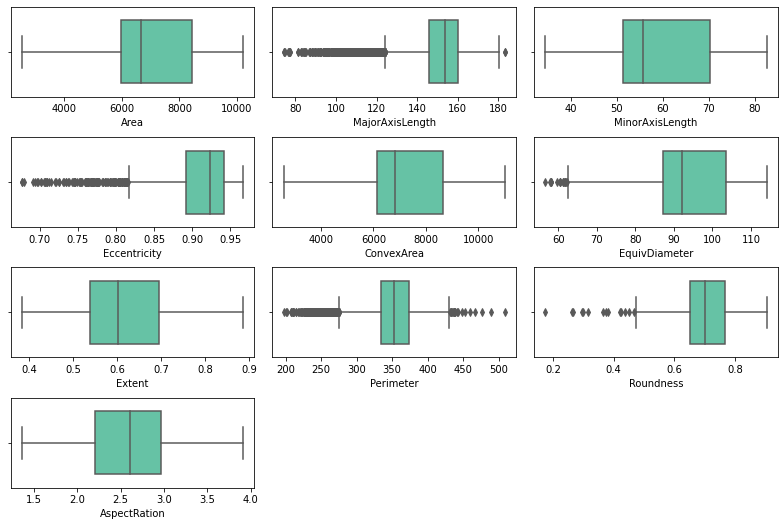

In [54]:
attributes =['Area','MajorAxisLength',	'MinorAxisLength',	'Eccentricity',	'ConvexArea',	'EquivDiameter',	'Extent',	'Perimeter',	'Roundness',	'AspectRation']

plt.figure(figsize = (11, 11))
for i,j in zip(attributes,range(10)):
  plt.subplot(6, 3, j+1)
  sns.boxplot(dt[i], palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

The boxplots suggest that the attributes: MajorAxisLength,	Eccentricity,	EquivDiameter,	Perimeter and	Roundness contain abnormally high values. So, we will be removing (statistical) outliers for these attributes.

As we know boxplot uses interquartile range to plot outliers and data where IQR is the difference between 1st and 3rd quartile so we use IQR to remove outliers.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

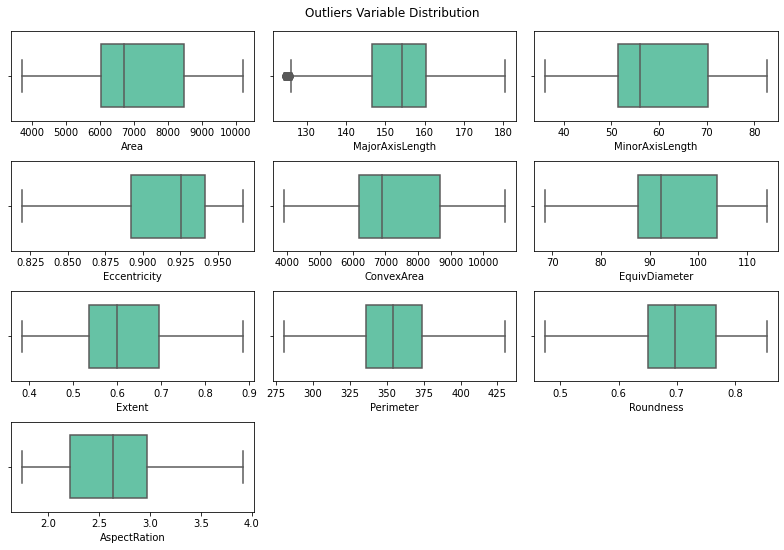

In [55]:
outliers=['MajorAxisLength',	'Eccentricity',	'EquivDiameter',	'Perimeter',	'Roundness']
for i in outliers: 
  Q1 = dt[i].quantile(0.25)   
  Q3 = dt[i].quantile(0.75)
  IQR = Q3 - Q1                   
  dt = dt[(dt[i] >= Q1 - 1.5*IQR) & (dt[i] <= Q3 + 1.5*IQR)]
  
attributes = dt.columns
plt.figure(figsize = (11, 11))
for i,j in zip(attributes,range(10)):
  plt.subplot(6, 3, j+1)
  sns.boxplot(dt[i], palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.suptitle('Outliers Variable Distribution')
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

## Class Imbalance Analysis
##  Cheak Duplicate Data



In [56]:
print('Number of duplicate rows: %d' % (dt.duplicated().sum()))
print(dt.Class.value_counts())

Number of duplicate rows: 0
jasmine    9542
Gonen      8055
Name: Class, dtype: int64


The results suggest that there are **no duplicate rows** in the dataset. So, we don't need to remove any row.

Since there is not much difference in the sample numbers of both classes, we can say that the data is balance.

# Discretization
Since all the attributes are continous and our class is binary, we will use **supervised discretization** in continuous attribute to calculate correlation with the class.

## Decision Tree Formation
For supervised discretization, we will use target class infomation to form bins with the help of decision trees. But, first, we have to find some optimal parameters, for example, depth of the tree.

In [57]:
le = LabelEncoder()
le.fit(dt['Class'])
dt['Class'] = le.transform(dt['Class'])

X=dt.iloc[:,0:10]
y=dt.iloc[:,10:]

The list *ls_score* will store the area under the ROC curve while *std_score* will store the std of the area under ROC for different depths of the tree. 

> More the area under ROC near to 1, better is the depth.



In [58]:
for col in X.columns:
  print(col)
  ls_score = []
  std_score = []
  for depth in [1,2,3,4,5]:
    tree_model = DecisionTreeClassifier(max_depth=depth)    
    scores = cross_val_score(tree_model, X[col].to_frame(),y, cv=3, scoring='roc_auc')   
    ls_score.append(np.mean(scores))
    std_score.append(np.std(scores))
  temp = pd.concat([pd.Series([1,2,3,4,5]), pd.Series(ls_score), pd.Series(std_score)], axis=1)
  temp.columns = ['depth', 'roc_auc_mean', 'roc_auc_std']
  print(temp)
  print()


Area
   depth  roc_auc_mean  roc_auc_std
0      1      0.922883     0.012726
1      2      0.956602     0.009529
2      3      0.969299     0.006101
3      4      0.971174     0.006235
4      5      0.971108     0.006076

MajorAxisLength
   depth  roc_auc_mean  roc_auc_std
0      1      0.550149     0.046627
1      2      0.543897     0.037372
2      3      0.549677     0.038745
3      4      0.546077     0.036259
4      5      0.542289     0.034636

MinorAxisLength
   depth  roc_auc_mean  roc_auc_std
0      1      0.968507     0.020220
1      2      0.975618     0.017313
2      3      0.979997     0.014526
3      4      0.981060     0.014898
4      5      0.979838     0.017158

Eccentricity
   depth  roc_auc_mean  roc_auc_std
0      1      0.671411     0.232351
1      2      0.671411     0.232351
2      3      0.671411     0.232351
3      4      0.671411     0.232351
4      5      0.393243     0.161046

ConvexArea
   depth  roc_auc_mean  roc_auc_std
0      1      0.920399     0.013102

From the above result, we select optimal depth for every attributes as follows-
* Area: 4 
* MajorAxisLength: 3
* MinorAxisLength: 4 
* Ecentricity: 2
* ConvexArea: 4
* EquivDiameter: 4
* Extent: 4
* Perimeter: 4
* Roundness: 4
* AspectRatio: 2

In [59]:
discrete = X.copy()
depth=[4,3,4,2,4,4,4,4,4,2]
for col,dep in zip(X.columns,depth):
  tree = DecisionTreeClassifier(max_depth=dep)
  tree.fit(X[col].to_frame(), y)
  discrete[col+'_tree']=tree.predict_proba(X[col].to_frame())[:,1]
discrete.head(8)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Area_tree,MajorAxisLength_tree,MinorAxisLength_tree,Eccentricity_tree,ConvexArea_tree,EquivDiameter_tree,Extent_tree,Perimeter_tree,Roundness_tree,AspectRation_tree
158,6374,129.576759,63.762307,0.870549,6476,90.086785,0.662234,314.656,0.809003,2.032184,0.909200,0.619983,0.011364,0.011089,0.902024,0.909200,0.412373,0.880906,0.006036,0.011089
186,6946,136.303603,65.738475,0.876009,7115,94.042128,0.594437,338.782,0.760508,2.073422,0.632613,0.619983,0.000138,0.011089,0.667575,0.632613,0.293858,0.782841,0.006036,0.011089
207,5786,125.555431,59.626250,0.880040,5945,85.831020,0.623491,307.304,0.769931,2.105707,0.961328,0.619983,0.291262,0.011089,0.954493,0.961328,0.293858,0.880906,0.006036,0.011089
218,5896,127.013995,59.843292,0.882050,6092,86.643063,0.610352,309.264,0.774655,2.122443,0.961328,0.619983,0.291262,0.011089,0.954493,0.961328,0.293858,0.880906,0.006036,0.011089
227,6082,129.098407,60.416315,0.883736,6204,87.999107,0.661375,308.106,0.805111,2.136814,0.961328,0.619983,0.158730,0.011089,0.954493,0.961328,0.412373,0.880906,0.006036,0.011089
230,5623,125.244184,58.183519,0.885541,5786,84.613391,0.565922,303.047,0.769410,2.152572,0.998026,0.619983,0.724138,0.011089,0.998327,0.998026,0.293858,0.880906,0.006036,0.011089
233,5642,125.867062,58.212050,0.886625,5759,84.756224,0.639973,301.902,0.777877,2.162217,0.998026,0.619983,0.724138,0.011089,0.998327,0.998026,0.412373,0.880906,0.006036,0.011089
242,6063,131.291578,60.178119,0.888769,6203,87.861547,0.789453,313.372,0.775849,2.181716,0.961328,0.619983,0.291262,0.011089,0.954493,0.961328,0.412373,0.880906,0.006036,0.011089


## Binning

In [60]:
for col in X.columns:
  print('For '+col+' Binnig is ')
  a=pd.concat([discrete.groupby([col+'_tree'])[col].min(),discrete.groupby([col+"_tree"])[col].max()], axis=1)
  print(a)
  print()

For Area Binnig is 
           Area   Area
Area_tree             
0.000000   7457  10210
0.187050   7380   7455
0.284810   7294   7378
0.404692   7137   7292
0.533040   7051   7136
0.632613   6898   7050
0.690411   6809   6897
0.765432   6722   6808
0.853264   6424   6721
0.909200   6181   6423
0.961328   5671   6180
0.998026   3698   5670
1.000000   7293   7293

For MajorAxisLength Binnig is 
                      MajorAxisLength  MajorAxisLength
MajorAxisLength_tree                                  
0.463942                   155.948858       172.314927
0.527778                   152.683979       155.943075
0.577465                   149.793990       152.662338
0.619983                   124.110890       147.124623
0.652482                   172.334907       180.332508
0.668841                   147.125145       149.790363
1.000000                   152.663987       155.948219

For MinorAxisLength Binnig is 
                      MinorAxisLength  MinorAxisLength
MinorAxisLength_tree 

In [61]:
discrete=discrete.iloc[:,10:]
discrete["Class"]=y
discrete.head()


,Area_tree,MajorAxisLength_tree,MinorAxisLength_tree,Eccentricity_tree,ConvexArea_tree,EquivDiameter_tree,Extent_tree,Perimeter_tree,Roundness_tree,AspectRation_tree,Class
158,0.909200,0.619983,0.011364,0.011089,0.902024,0.909200,0.412373,0.880906,0.006036,0.011089,1
186,0.632613,0.619983,0.000138,0.011089,0.667575,0.632613,0.293858,0.782841,0.006036,0.011089,1
207,0.961328,0.619983,0.291262,0.011089,0.954493,0.961328,0.293858,0.880906,0.006036,0.011089,1
218,0.961328,0.619983,0.291262,0.011089,0.954493,0.961328,0.293858,0.880906,0.006036,0.011089,1
227,0.961328,0.619983,0.158730,0.011089,0.954493,0.961328,0.412373,0.880906,0.006036,0.011089,1


# Dimension Reduction
We will now compute the correlation between pairs of attributes and between attribute and class and plot them in a heat map for visualization which will help in dimension reduction.

Since data is now in the form of bins so for finding correlation between the class and the attributes I will use Cramér's V method which is based on the chi square measure whose value varies from 0 to 1 as weak association and strong association respectively I have printed only those attribute whose association value is greater than 0.9 as strong association

In [62]:
def cramers(data1, data2):
    confusion_matrix = pd.crosstab(data1,data2)
    chi2 = st.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
for col in discrete.columns:
  if col!='Class':
    association=cramers(discrete[col],discrete.Class)
    if association >= 0.9 or association <= -0.9:
      print("Correlation between Class and "+col+" is: "+str(association))
      print()

Correlation between Class and MinorAxisLength_tree is: 0.9775749684647029

Correlation between Class and Eccentricity_tree is: 0.9653243040870586

Correlation between Class and Roundness_tree is: 0.9479493914135833

Correlation between Class and AspectRation_tree is: 0.9653243040870586



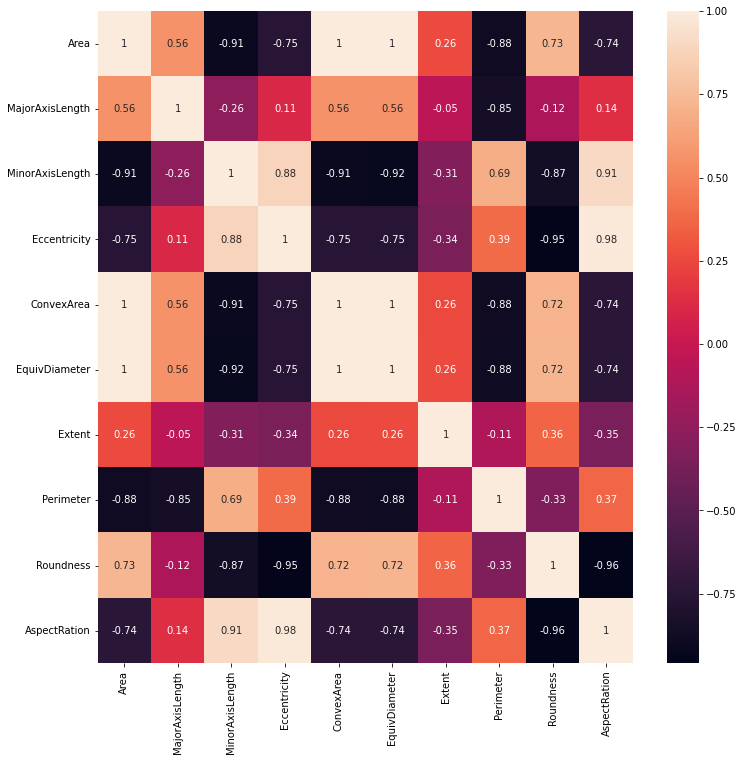

In [44]:
plt.figure(figsize = (12, 12))
sns.heatmap(X.corr(),annot=True)
plt.show()

From the coorelation heatmap:
* MinorAxisLength is highly correlated to Area (0.95), ConvexArea (0.95), EquivDiameter (0.95), Ecentricity (-0.92), AspectRation (-0.91) and Class (0.977).
* Ecentricity is highly correlated to MinorAxisLength(-0.92), Roundness(-0.95), AspectRation (0.98) and Class (0.968).
* Roundness is highly correlated to Ecentricity (-0.95), AspectRation (-0.96) and Class (0.94).
* AspectRation is highly correlated to MinorAxisLength (-0.91), Ecentricity (0.98), Roundness (-0.96) and Class (0.965).

We will go with MinorAxisLength, Ecentricity, Extent and Perimeter as our attributes.

In [63]:
columns = np.full((X.corr().shape[0],), False, dtype=bool)
columns[2]=True
columns[3]=True
columns[6]=True
columns[7]=True
selected_columns = X.columns[columns]
X = X[selected_columns]
X.head()


,MinorAxisLength,Eccentricity,Extent,Perimeter
158,63.762307,0.870549,0.662234,314.656
186,65.738475,0.876009,0.594437,338.782
207,59.626250,0.880040,0.623491,307.304
218,59.843292,0.882050,0.610352,309.264
227,60.416315,0.883736,0.661375,308.106


# Data Transformation
In this section,We are try to make the distribution of continuous numerical data as Normal (Gaussian).

I will be checking their normality using the **Kurtosis** value and plotting the graph for visualization.

Kurtosis value for MinorAxisLength is: 1.56
Kurtosis value for Eccentricity is: 1.84


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Kurtosis value for Extent is: 2.14
Kurtosis value for Perimeter is: 2.55


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


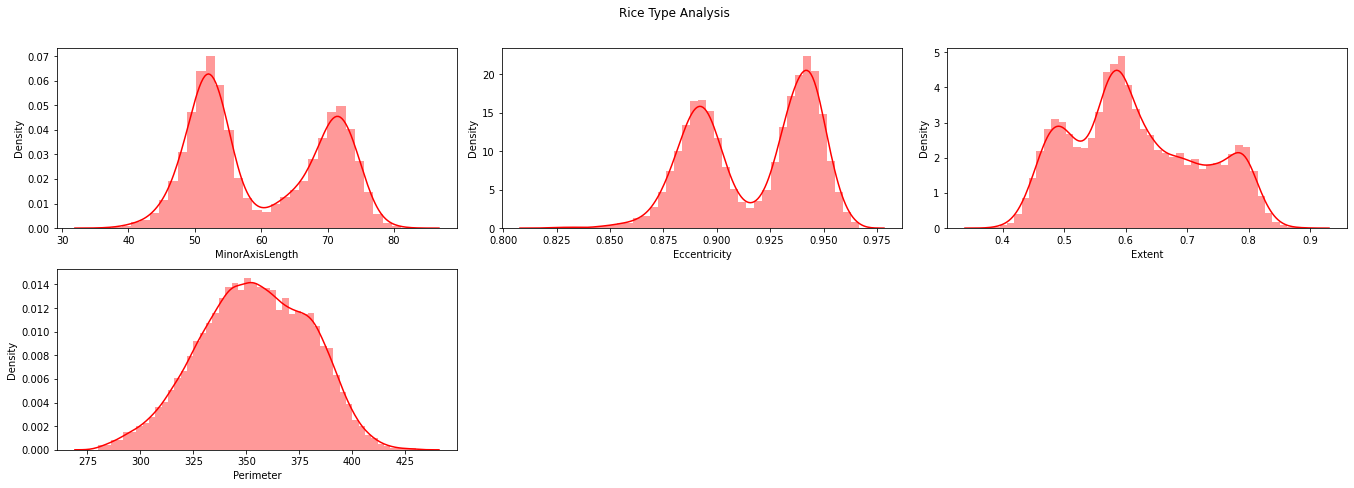

In [64]:
plt.figure(figsize = (19, 19))
j = 0
for i in X.columns:
  print("Kurtosis value for "+i+" is: %0.2f"%(st.kurtosis(X[i],fisher=False)))
  plt.subplot(6, 3, j+1)
  sns.distplot(X[i],color="red")
  j += 1
plt.suptitle('Rice Type Analysis')
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

## Applying 1/x transformation on Perimeter Attribute





Kurtosis value for Perimeter after transformation is: 2.93


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


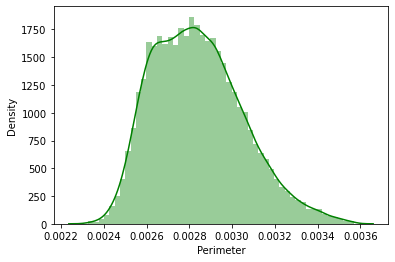

In [65]:
X["Perimeter"]=X["Perimeter"].transform(func = lambda x : 1/x)
print("Kurtosis value for "+i+" after transformation is: %0.2f"%(st.kurtosis(X["Perimeter"],fisher=False)))
sns.distplot(X["Perimeter"],color="green")
plt.show()

## Transforming MinorAxisLength Attribute

Kurtosis value for Perimeter after transformation is: 2.96


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


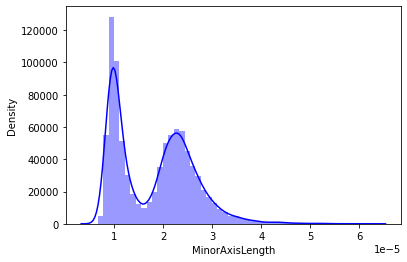

In [66]:
X["MinorAxisLength"]=X["MinorAxisLength"].transform(func = lambda x : 1/np.power(x,2.7))
print("Kurtosis value for "+i+" after transformation is: %0.2f"%(st.kurtosis(X["MinorAxisLength"],fisher=False)))
sns.distplot(X["MinorAxisLength"],color="blue")
plt.show()


## Transforming Extent Attribute

Kurtosis value for Perimeter after transformation is: 3.00


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


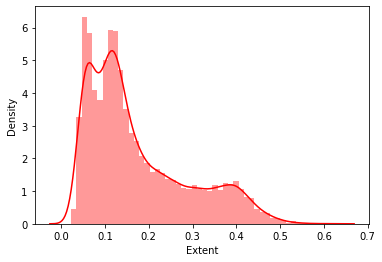

In [67]:
X["Extent"]=X["Extent"].transform(func = lambda x : np.power(x,3.95))
print("Kurtosis value for "+i+" after transformation is: %0.2f"%(st.kurtosis(X["Extent"],fisher=False)))
sns.distplot(X["Extent"],color="red")
plt.show()

## Transforming Eccentricity Attribute

Kurtosis value Perimeter after transformation is: 3.18


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


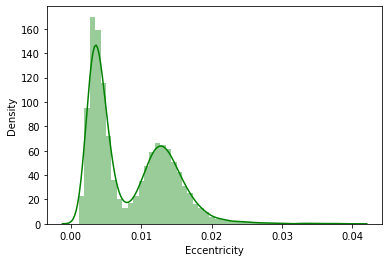

In [68]:
X["Eccentricity"]=X["Eccentricity"].transform(func = lambda x : np.power(np.log(x),2))
print("Kurtosis value "+i+" after transformation is: %0.2f"%(st.kurtosis(X["Eccentricity"],fisher=False)))
sns.distplot(X["Eccentricity"],color="green")
plt.show()

# Dimension Reduction

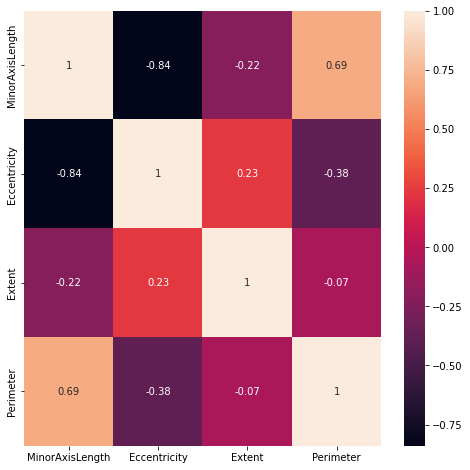

In [69]:
plt.figure(figsize=(8,8))
sns.heatmap(X.corr(),annot=True)
plt.show()

Since no two attributes are highly correlated, we wont be removing any other feature further.

## Data Standarziation

In [70]:
SS = StandardScaler()
data = SS.fit_transform(X)
X = pd.DataFrame(data)
X.columns=['MinorAxisLength', 'Eccentricity', 'Extent', 'Perimeter']
X.describe()

,MinorAxisLength,Eccentricity,Extent,Perimeter
count,1.759700e+04,1.759700e+04,1.759700e+04,1.759700e+04
mean,-4.615467e-16,1.269618e-15,-9.007967e-16,1.791833e-15
std,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00
min,-1.449896e+00,-1.322254e+00,-1.309310e+00,-2.434857e+00
25%,-9.875160e-01,-8.732976e-01,-7.606527e-01,-7.748236e-01
50%,1.233656e-01,-4.408198e-01,-3.465551e-01,-8.415201e-02
75%,7.319105e-01,8.222901e-01,5.582965e-01,6.435588e-01
max,5.540018e+00,5.673419e+00,3.896043e+00,3.456330e+00


# Classification
### Importing Modules


In [71]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from statistics import mean
from math import sqrt

We will use 5x5 fold validation technique for cross validation with stratified sampling for all classification models.

In [72]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)

### Function to find pessimistic error on train set
We use the average training accuracies, average lengths of the splittted sets and the parameter to calculate an average of pessimistic error on the training data where  try to give the model a penalty for its complexity.

In [73]:
def evaluate_train(accuracy, total, parameter, classes=2):
  train_error=1-accuracy
  pessi_error=train_error+(parameter/classes)/total
  print('Pessimistic error on train set is: %.3f'% pessi_error)

### Function to Evaluate and Calculate True Error on test set
Assuming that our sample is drawn independent of the model and each other and since the number of training examples in all the cases will be n greater than 30, we can say that with N% probability, the error of the entire distribution (true error) lies in the interval.

So, we use the average test accuracies and average lengths of the splittted sets to calculate an average of true errors on the test data.

In [74]:
# Model Accuracy, how often is the classifier correct?
def evaluate_test(accuracy, length):
  print("Accuracy over Test Data: %.2f" % (accuracy*100))
  error=1-accuracy
  interval = sqrt( (error * (1 - error)) / length)
  print('Error with 90 percent confidence is: %.3f'% (error*100),'± %.3f'% (1.64*interval*100))
  print('Error with 80 percent confidence is: %.3f'% (error*100),'± %.3f'% (1.28*interval*100))

###Operational Function
Here We will apply our StratifiedKFold object and return an average of training accuracies, test accuracies, and the lengths of the splittted sets.

In [75]:
def train_and_evaluate(classifier):
  train_length=[]
  test_length=[]
  test_accuracy = []
  train_accuracy = []
  
  for train_index, test_index in skf.split(X, y): 
      X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index] 
      y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index] 
      classifier.fit(X_train_fold, y_train_fold.values.ravel())
      train_length.append(len(train_index))
      test_length.append(len(test_index))
      test_accuracy.append(classifier.score(X_test_fold, y_test_fold))
      train_accuracy.append(classifier.score(X_train_fold, y_train_fold))

  # Plot of Accuracies of various
  plt.plot(range(0,5),test_accuracy,'bv--')
  plt.legend(['Test Accuracy'])
  plt.xlabel('Test Sample')
  plt.ylabel('Accuracy')
  plt.show()
  
  print('We can see that the test accuracies lie in the range of %.3f' % min(test_accuracy),'to %.3f.'% max(test_accuracy))
  
  return (mean(train_accuracy),mean(test_accuracy),mean(train_length),mean(test_length))

Now, We will perform classification by applying various classification algorithms. And then, We'll estimate how accurately our classifier can predict the type of rice by comparing actual test set values and predicted values during the stratified cross validation process.

## Desision Tree
In this section, I apply ID3- a decision tree classifier to the rice dataset obtained after preprocessing.

In [76]:
# Gaussian Naive Bayes model
from sklearn.tree import DecisionTreeClassifier

### Identifying the Max depth required
We will split the data as 75% train and 25% test for this purpose.


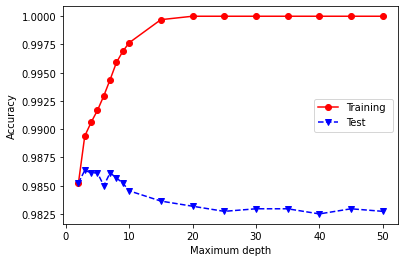

Maximum test accuracy value is 0.9864 for depth 3.


In [77]:
# Model fitting and evaluation
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

# Training and Test set creation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

trainAcc = []
testAcc = []

for depth in maxdepths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))

max_depth=maxdepths[testAcc.index(max(testAcc))]

# Plot of training and test accuracies    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training ','Test'])
plt.xlabel('Maximum depth')
plt.ylabel('Accuracy')
plt.show()

print('Maximum test accuracy value is %.4f'% max(testAcc),'for depth %d.'% max_depth)

### Operational Phase
Here, We will train the data on our operational function using the max_depth value obtained above and then plot the test accuracies obtained for the 5 rounds of our 5x5 fold cross validation with stratified sampling for our Decision Tree classifier.

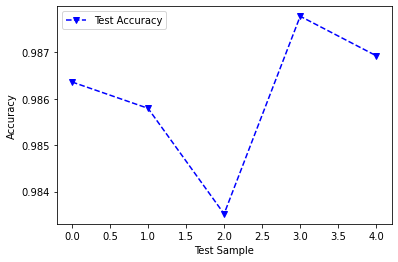

We can see that the test accuracies lie in the range of 0.984 to 0.988.


In [78]:
dt = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=max_depth, min_samples_leaf=5)
train_accuracy,test_accuracy,train_length,test_length=train_and_evaluate(dt)

### Displaying the generated tree

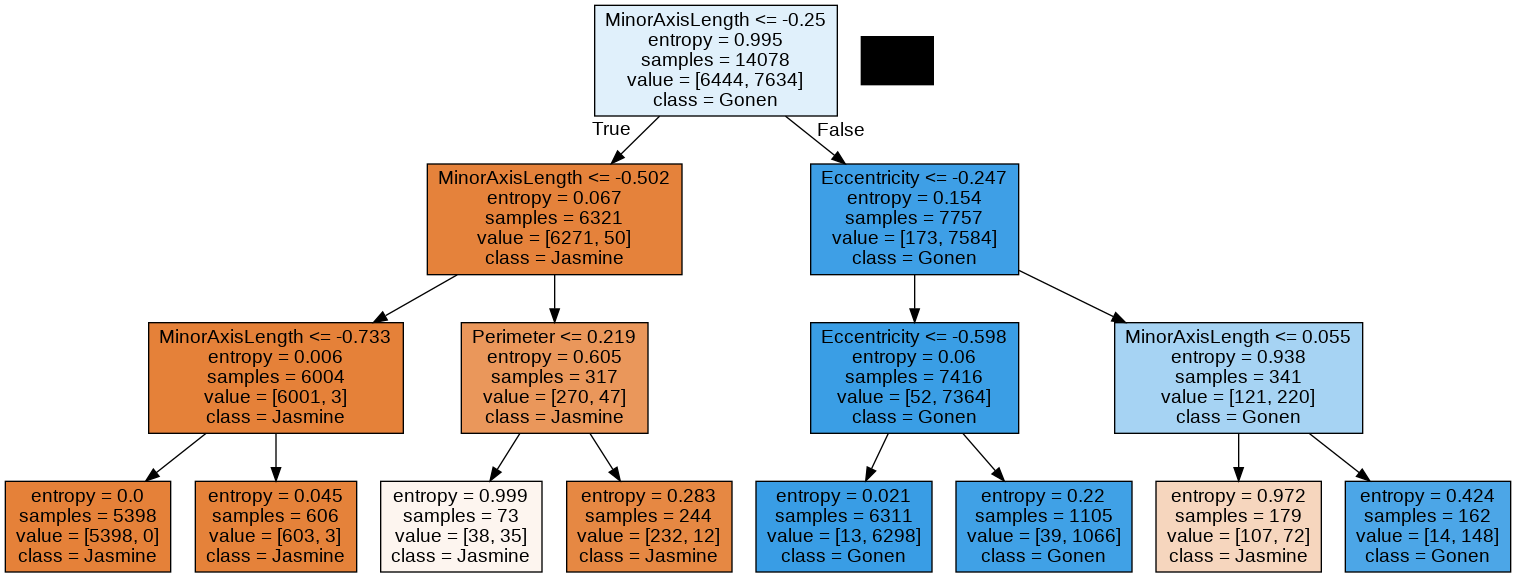

In [79]:
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz

dot_data = export_graphviz(dt, feature_names=X.columns, class_names=['Jasmine','Gonen'], filled=True, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### Evaluation on Train Set
We can see that the generated tree has 8 leaf nodes. Thus, I use the number of leaf nodes as a measure of our model complexity while finding the pessimistic error.

In [80]:
evaluate_train(train_accuracy,train_length,8)

Pessimistic error on train set is: 0.013


### Evaluation on Test Set

In [81]:
evaluate_test(test_accuracy,test_length)

Accuracy over Test Data: 98.61
Error with 90 percent confidence is: 1.392 ± 0.324
Error with 80 percent confidence is: 1.392 ± 0.253


## Naive Bayes
Here, We will train the data and then plot the test accuracies obtained for the 5 rounds of our 5x5 fold cross validation with stratified sampling for our naive bayes classifier.

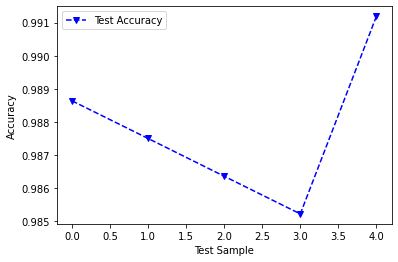

We can see that the test accuracies lie in the range of 0.985 to 0.991.


In [93]:

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
train_accuracy,test_accuracy,train_length,test_length=train_and_evaluate(nb)

### Evaluation on Train Set


In [83]:
evaluate_train(train_accuracy,train_length,X.shape[1])

Pessimistic error on train set is: 0.012


### Evaluation on Test Set

In [84]:
evaluate_test(test_accuracy,test_length)

Accuracy over Test Data: 98.78
Error with 90 percent confidence is: 1.222 ± 0.304
Error with 80 percent confidence is: 1.222 ± 0.237


# Classification with KNN
We will take k=5 for this project and use Minkowski distance as our metric.

In [85]:
from sklearn.neighbors import KNeighborsClassifier

### Identifying the p value
We will split the data as 75% train and 25% test for this purpose.

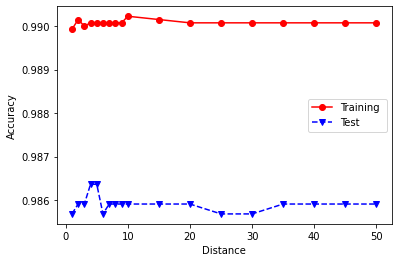

maximum test accuracy value is 0.9863636363636363 for distance 4


In [94]:
distances = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

trainAcc = []
testAcc = []

for distance in distances:
    knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=distance)
    knn.fit(X_train, y_train.values.ravel())
    y_predTrain = knn.predict(X_train)
    y_predTest = knn.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))

best_distance=distances[testAcc.index(max(testAcc))]

# Plot of training and test accuracies    
plt.plot(distances,trainAcc,'ro-',distances,testAcc,'bv--')
plt.legend(['Training ','Test'])
plt.xlabel('Distance')
plt.ylabel('Accuracy')
plt.show()

print('maximum test accuracy value is',max(testAcc),'for distance',best_distance)

### Operational Phase


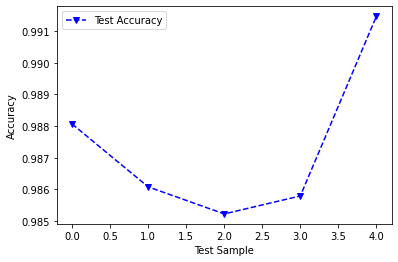

We can see that the test accuracies lie in the range of 0.985 to 0.991.


In [87]:
# Creating a KNN Classifier Object
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=best_distance)

train_accuracy,test_accuracy,train_length,test_length=train_and_evaluate(knn)

### Evaluation on Train Set


In [88]:
evaluate_train(train_accuracy,train_length,knn.n_neighbors)

Pessimistic error on train set is: 0.011


### Evaluation on Test Set

In [89]:
evaluate_test(test_accuracy,test_length)

Accuracy over Test Data: 98.73
Error with 90 percent confidence is: 1.267 ± 0.309
Error with 80 percent confidence is: 1.267 ± 0.241


## Comparing Classifiers
Here is a comparison for how our various models compare, scored by accuracy:

| Model | Accuracy Score |
|--------------------------|:------:|
| Naive Bayes  | 98.78 |
| 5 Nearest Neighbour  | 98.73 |
| Decision Tree  | 98.61 |

We can still make a relative comparision on these models based on their accuracy score as: ** Naive Bayes > 5 Nearest Neighbour > Decision Tree**. All these accuracy values are acceptable and thus the models perform well.

Based on their true error scores, we can say that besides Naive Bayes has the least true error for both the considered intervals followed by KNN. Decision Tree has a relatively high true error rate. This point to the same ordering of preference as above.